In [8]:
import pandas as pd
import os
import time
from transformers import pipeline

In [9]:
PATH_CONSOLIDADO = '../data_consolidated/'
files = sorted(os.listdir(PATH_CONSOLIDADO))
files

['dataTW_GP__(@JaimeChincha.csv',
 'dataTW_GP__(RMP.csv',
 'dataTW_GP__@JaimeChincha.csv',
 'dataTW_GP__@interbank.csv',
 'dataTW_GP__Malcricarmen.csv',
 'dataTW_GP__Vacancia.csv',
 'dataTW_GP__hildebrant.csv',
 'dataTW_GP__repsol.csv',
 'dataTW_GP__willax.csv',
 'usersTW_GP__(@JaimeChincha.csv',
 'usersTW_GP__(RMP.csv',
 'usersTW_GP__@JaimeChincha.csv',
 'usersTW_GP__@interbank.csv',
 'usersTW_GP__Malcricarmen.csv',
 'usersTW_GP__Vacancia.csv',
 'usersTW_GP__hildebrant.csv',
 'usersTW_GP__repsol.csv',
 'usersTW_GP__willax.csv']

In [10]:
data = {}
for file in files:
    data[file] = pd.read_csv(os.path.join(PATH_CONSOLIDADO, file))

In [ ]:
data['dataTW_GP__hildebrant.csv']

,reply_settings,public_metrics,in_reply_to_user_id,source,conversation_id,referenced_tweets,text,id,lang,created_at,author_id,keyword,timestamp,geo
0,everyone,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1.332811e+18,Twitter for Android,1494431728710164483,"[{'type': 'replied_to', 'id': '149465658079670...",@Mijail50386462 @j053_4n @AlvaroVargasLl Jajaj...,1494719619059363844,es,2022-02-18T17:05:02.000Z,1304877592290504710,hildebrant -is:retweet lang:es,2022-02-18 20:00:35.00,NaN
1,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",7.189985e+08,Twitter for Android,1494707328653971461,"[{'type': 'replied_to', 'id': '149470732865397...",@marita_molina4 El enano Hildebrant se cree Co...,1494714453128011778,es,2022-02-18T16:44:30.000Z,1062326301292486658,hildebrant -is:retweet lang:es,2022-02-18 20:00:34.20,NaN
2,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",5.479793e+07,Twitter for Android,1492256442631479296,"[{'type': 'replied_to', 'id': '149225644263147...",@sigridbazan Gracias a Hildebrant y sus 13 con...,1492483317312237573,es,2022-02-12T12:58:46.000Z,1566260070,hildebrant -is:retweet lang:es,2022-02-15 08:15:54.81,NaN
3,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1.248433e+08,Twitter for iPhone,1492149458913615877,"[{'type': 'replied_to', 'id': '149214945891361...",@ensustrece Que bueno que se reúnan para vacia...,1492483056044855297,es,2022-02-12T12:57:44.000Z,139302344,hildebrant -is:retweet lang:es,2022-02-15 08:15:54.81,NaN
4,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",7.131398e+07,Twitter for Android,1492324509008994304,"[{'type': 'replied_to', 'id': '149234499162828...",@sabercomo @julianaoxenford Cuando pienso en e...,1492482305448759296,es,2022-02-12T12:54:45.000Z,880745650933174273,hildebrant -is:retweet lang:es,2022-02-15 08:15:54.81,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1.334627e+18,Twitter for Android,1492933301971169282,"[{'type': 'replied_to', 'id': '149293330197116...",@CynthiaRivarol5 HILDEBRANT Y SU MUJER BASUARE...,1492952518875402241,es,2022-02-13T20:03:12.000Z,2988864995,hildebrant -is:retweet lang:es,2022-02-15 08:17:14.40,NaN
1130,everyone,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",7.713518e+17,Twitter for Android,1492689650720325634,"[{'type': 'replied_to', 'id': '149268965072032...",@LaSalitadelSin @ensustrece HILDEBRANT Y SU MU...,1492952116536688648,es,2022-02-13T20:01:36.000Z,2988864995,hildebrant -is:retweet lang:es,2022-02-15 08:17:14.40,NaN
1131,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2.185477e+08,Twitter for Android,1492860146007040004,"[{'type': 'replied_to', 'id': '149286014600704...",@danielyovera @ANP_periodistas @ATV @ensustrec...,1492952022844280832,es,2022-02-13T20:01:14.000Z,1489452548570468357,hildebrant -is:retweet lang:es,2022-02-15 08:17:14.40,NaN
1132,everyone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",6.863815e+07,Twitter for Android,1492944438934577157,"[{'type': 'replied_to', 'id': '149294443893457...",@salvajedigital HILDEBRANT Y SU MUJER BASUAREA...,1492951969870270468,es,2022-02-13T20:01:01.000Z,2988864995,hildebrant -is:retweet lang:es,2022-02-15 08:17:14.40,NaN


In [12]:
def get_public_metrics(dataset):
    '''Extrae la columna "public_metrics" que se encuentra en el dataset'''
    df_public = pd.DataFrame()
    for i, row in dataset.iterrows():
        public_metrics = eval(row['public_metrics'])
        public_metrics['id'] = row['id']
        df_i = pd.DataFrame([public_metrics])
        df_public = df_public.append(df_i).reset_index(drop=True)        
    return df_public

def get_referenced_tweets(dataset):
    '''Extrae la columna "referenced_tweets" que se encuentra en el dataset'''
    df_referenced = pd.DataFrame()
    for i, row in dataset.iterrows():
        try:
            referenced_tweets = eval(row['referenced_tweets'])[0]
            referenced_tweets['id_ref'] = referenced_tweets['id']
        except:
            referenced_tweets = {}
        referenced_tweets['id'] = row['id']

        df_i = pd.DataFrame([referenced_tweets])
        df_referenced = df_referenced.append(df_i)
    return df_referenced

def get_mentions(text):
    '''Extrae las cuentas de twitter mencionadas'''
    split = text.split('@')
    mentions = [f"@{x.split(' ')[0]}" for x in split if len(x.split(' ')[0]) > 4]
    return mentions

def get_clean_text(text):
    '''Limpia el texto eliminando las menciones'''
    split = text.split('@')
    mentions = [f"@{x.split(' ')[0]}" for x in split if len(x.split(' ')[0]) > 4]
    
    for mention in mentions:
        text = text.replace(mention, '')
    text = text.replace('  ', ' ').replace('  ', ' ').replace('  ', ' ')
    text = text.replace(' ,', '')
    text = text.replace('\n', '').strip()
    return text


def get_sentiment_and_prob(text, sentiment):
    '''Evaluates and predicts the sentiment based on a text'''
    pred = sentiment(text)[0]
    preds = int(pred['label'][0]) + pred['score']
    return preds


def process_json_cols(dataset, print_progress=False):
    '''Realiza todo el procesamiento de limpieza con las funciones antes definidas'''
    start_time = time.time()
    dataset_1 = dataset.copy()
    
    # Obtaining Json Data
    public_metrics = get_public_metrics(dataset)
    referenced_tweets = get_referenced_tweets(dataset)
    
    # Merging Json Data
    dataset_1 = dataset_1.merge(public_metrics, on='id', how='left')
    dataset_1 = dataset_1.merge(referenced_tweets, on='id', how='left')
    dataset_1 = dataset_1.drop(['public_metrics', 'geo', 'referenced_tweets'], axis=1)
    
    # Cleaning Data
    dataset_1['mentions'] = dataset_1['text'].apply(get_mentions)
    dataset_1['num_mentions'] = dataset_1['mentions'].str.len()
    dataset_1['clean_text'] = dataset_1['text'].apply(get_clean_text)
    
    # Process Sentiment Data
    dataset_1['sentiment_output'] = dataset_1['clean_text'].apply(get_sentiment_and_prob, args=[sentiment])
    dataset_1['sentiment_pred'] = (dataset_1['sentiment_output']//1).astype(int)
    dataset_1['sentiment_conf'] = dataset_1['sentiment_output']%1
    
    processing_time = (time.time() - start_time)
    
    if print_progress:
        print(f'INFO: Processing Time:\t{processing_time:.2f} seconds')

    return dataset_1

In [13]:
# Initialize Sentiment Model
sentiment = pipeline(task = 'sentiment-analysis',
                     model = 'nlptown/bert-base-multilingual-uncased-sentiment',
                     tokenizer = 'nlptown/bert-base-multilingual-uncased-sentiment')

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("T'estimo!")

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [13]:
# Initialize Sentiment Model
sentiment = pipeline(task = 'sentiment-analysis',
                     model = 'nlptown/bert-base-multilingual-uncased-sentiment',
                     tokenizer = 'nlptown/bert-base-multilingual-uncased-sentiment')

Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [28]:
target = 120
current = 260
correction_f = 80

In [49]:
def special_round(current, target, correction_f):
    dosing = (current - target) / correction_f
    print(f'Original dosing:\t{dosing}')
    
    dosing_decimal = dosing % 1
    dosing_int = dosing // 1
    if (dosing_decimal > 0.85):
        rounded_dosing = dosing_int + 1
    elif (dosing_decimal>0.5):
        rounded_dosing = dosing_int + 0.5
    else:
        rounded_dosing = dosing_int

    print(f'Rounded dosing: \t{rounded_dosing}')        
    return rounded_dosing

rounded_dosing = special_round(current=260, target=120, correction_f=80)

Original dosing:	1.75
Rounded dosing: 	1.5


In [14]:
dataset = data['dataTW_GP__hildebrant.csv']

In [15]:
dataset = process_json_cols(dataset, print_progress=True)

INFO: Processing Time:	220.91 seconds


In [22]:
dataset['keyword']

0       hildebrant -is:retweet lang:es
1       hildebrant -is:retweet lang:es
2       hildebrant -is:retweet lang:es
3       hildebrant -is:retweet lang:es
4       hildebrant -is:retweet lang:es
                     ...              
1129    hildebrant -is:retweet lang:es
1130    hildebrant -is:retweet lang:es
1131    hildebrant -is:retweet lang:es
1132    hildebrant -is:retweet lang:es
1133    hildebrant -is:retweet lang:es
Name: keyword, Length: 1134, dtype: object

In [20]:
list(dataset)

['reply_settings',
 'in_reply_to_user_id',
 'source',
 'conversation_id',
 'text',
 'id',
 'lang',
 'created_at',
 'author_id',
 'keyword',
 'timestamp',
 'retweet_count',
 'reply_count',
 'like_count',
 'quote_count',
 'type',
 'id_ref',
 'mentions',
 'num_mentions',
 'clean_text',
 'sentiment_output',
 'sentiment_pred',
 'sentiment_conf']

In [18]:
dataset['mentions']

0         [@Mijail50386462, @j053_4n, @AlvaroVargasLl]
1                                    [@marita_molina4]
2                                       [@sigridbazan]
3                           [@ensustrece, @ensustrece]
4                       [@sabercomo, @julianaoxenford]
                             ...                      
1129                                [@CynthiaRivarol5]
1130                    [@LaSalitadelSin, @ensustrece]
1131    [@danielyovera, @ANP_periodistas, @ensustrece]
1132                                 [@salvajedigital]
1133                                [@ValeriaBersaken]
Name: mentions, Length: 1134, dtype: object

<AxesSubplot:>

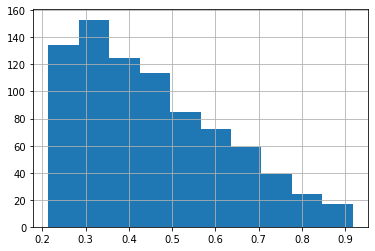

In [8]:
dataset['sentiment_conf'].hist()

In [7]:
# Initialize Sentiment Model
twitter_roberta = 'cardiffnlp/twitter-xlm-roberta-base-sentiment'
sentiment_multi = pipeline(task = 'sentiment-analysis',
                             model = twitter_roberta,
                             tokenizer = twitter_roberta)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [141]:
dataset[['clean_text','sentiment_output']].iloc[4]

clean_text          Gracias a las personas..*Aplaude*
sentiment_output                             5.646634
Name: 4, dtype: object

In [30]:
dataset['clean_text'].to_list()

['Qué les pareció?',
 'Ahora pues https://t.co/G0tax9PNxd',
 'Dos sobones dos chupes 2 caviares UN CAMINO en la emisora del Oficialismo Chavista Atatauuu.. ajjjjjj',
 'a escuchar al gran Cesar H. Con ahorita en vivo',
 'Gracias a las personas..*Aplaude*',
 'Los mismos de ventanilla ni saben que es un distrito del callao 🤣 nadie me lo contó yo lo he visto',
 'Si porque las preguntas que le hicieron Mavila Huertas, Pedro Tenorio y Jaime Chincha no cuentan, porque no son milagros Leiva',
 'LOS RESPONSABLES SON REPSOL Y EL INEPTO DE CASTILLO QUE SE DEMORO EN REACCIONAR! PARA VARIAR ESTANA HACIENDO CUALQUIER COSA MENOS GOBERNAR',
 'Es lo único que saben estos rojos, ahuyentar a los inversionistas sin proponer soluciones.',
 'El detalle Jaime es que intentas emular una suerte de hibrido entre Jaime Bayliy Cesar Hildebrant. Sumado al ego colosal que tienes y es fácil caer en engrandecerse teniendo una generación de periodistas buitres y limitados donde resulta usted es el único que lee o argu

In [ ]:
text

In [9]:
users = data['usersTW_GP__hildebrant.csv']

In [10]:
users

,username,verified,name,id,public_metrics,description,created_at,keyword,timestamp
0,omot_14,False,Omar Ortega Telles,31305297,"{'followers_count': 184, 'following_count': 66...",Finanzas - Universidad del Pacífico. Liberal,2009-04-15T02:04:49.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:15:21.16
1,ToniAlvaL,True,María Antonieta Alva Luperdi,1179864482174119937,"{'followers_count': 573334, 'following_count':...",Servidora pública comprometida con el desarrol...,2019-10-03T21:03:56.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:15:21.16
2,milaoliveros,False,Milagros Oliveros,242803898,"{'followers_count': 758, 'following_count': 18...",NaN,2011-01-25T16:51:32.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:16:57.06
3,unchasqui,False,Un Chasqui del Bicentenario,3700799482,"{'followers_count': 28092, 'following_count': ...",Dizque comunicador con experiencia en radio y ...,2015-09-18T22:13:44.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:16:57.06
4,Alexis74395222,False,Alexis,1302058692947345409,"{'followers_count': 1, 'following_count': 11, ...","Criterio, mucho Criterio.",2020-09-05T01:39:32.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:16:57.06
...,...,...,...,...,...,...,...,...,...
1868,cesaropinion95,False,Cesar M. 🎥🎬📷,394393605,"{'followers_count': 177, 'following_count': 45...",Sobre mí? Un tipo tranquilo y con un extraño s...,2011-10-20T00:40:25.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:15:14.81
1869,luz_amelia18,False,Valeria Rodriguez,833464958436380672,"{'followers_count': 168, 'following_count': 42...",NaN,2017-02-19T23:55:06.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:15:14.81
1870,FedericoPFE,False,Federico Roberto P F,2740119220,"{'followers_count': 640, 'following_count': 93...",la verdad aunque tarde siempre se sabrá. Perua...,2014-08-11T18:03:12.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:15:14.81
1871,fruiz159,False,Fernando Ruiz Inga,292954337,"{'followers_count': 55, 'following_count': 33,...",Especialista en sistemas informaticos para mun...,2011-05-04T14:27:02.000Z,hildebrant -is:retweet lang:es,2022-02-15 08:15:14.81


# Sentiment Analysis

In [11]:
from transformers import pipeline

In [ ]:
pipe = pipeline("sentiment-analysis", model="<your_model_here>", tokenizer="<your_tokenizer_here>")

In [12]:
sa = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
sa("We are happy to be in last session of the course")

[{'label': 'POSITIVE', 'score': 0.999824583530426}]

In [ ]:
sa("The movie was really bad")

[{'label': 'NEGATIVE', 'score': 0.99980229139328}]

In [ ]:
sa("I don't mind walking")

[{'label': 'POSITIVE', 'score': 0.7957820296287537}]

In [ ]:
sa_es = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
sa_es("El producto es excelente")

[{'label': '5 stars', 'score': 0.6660403609275818}]

In [ ]:
sa_es("No me gustó mucho la comida")

[{'label': '2 stars', 'score': 0.5694628357887268}]

# Named Entity Recognition

In [ ]:
ner = pipeline("ner")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english)


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

"""Bitcoin has jumped past $30,000 as Elon Musk said Tesla is "most likely" to start accepting it as payment again."""

In [ ]:
text = """Bitcoin has jumped past $30,000 as Elon Musk said Tesla is "most likely"
          to start accepting it as payment again."""

In [ ]:
[print(r) for r in ner(text)]

{'entity': 'I-PER', 'score': 0.9992423, 'index': 12, 'word': 'El', 'start': 35, 'end': 37}
{'entity': 'I-PER', 'score': 0.9975107, 'index': 13, 'word': '##on', 'start': 37, 'end': 39}
{'entity': 'I-PER', 'score': 0.9971636, 'index': 14, 'word': 'Mu', 'start': 40, 'end': 42}
{'entity': 'I-PER', 'score': 0.9745453, 'index': 15, 'word': '##sk', 'start': 42, 'end': 44}
{'entity': 'I-ORG', 'score': 0.9316861, 'index': 17, 'word': 'Te', 'start': 50, 'end': 52}
{'entity': 'I-ORG', 'score': 0.94788617, 'index': 18, 'word': '##sla', 'start': 52, 'end': 55}


[None, None, None, None, None, None]

In [141]:
dataset['text'].values[-1]

'A los Guaripoleros @DeltaMdelta @JaimeChincha @MavilaHuertasC se le suma @ensustrece con una merme entrevista, luego @NicolasLucar los trolls preparan ya 👏👏👏👏 @EIPeruano @LaSalitadelSin @RecuerdosPeru @eloymarchan @Angelpaezs @jgodoym @TrujiYo https://t.co/gWOQUoIHVg'

In [142]:
text = 'A los Guaripoleros @DeltaMdelta @JaimeChincha @MavilaHuertasC se le suma @ensustrece con una merme entrevista, luego @NicolasLucar los trolls preparan ya 👏👏👏👏 @EIPeruano @LaSalitadelSin @RecuerdosPeru @eloymarchan @Angelpaezs @jgodoym @TrujiYo https://t.co/gWOQUoIHVg'

In [147]:
split = text.split('@')
split

['A los Guaripoleros ',
 'DeltaMdelta ',
 'JaimeChincha ',
 'MavilaHuertasC se le suma ',
 'ensustrece con una merme entrevista, luego ',
 'NicolasLucar los trolls preparan ya 👏👏👏👏 ',
 'EIPeruano ',
 'LaSalitadelSin ',
 'RecuerdosPeru ',
 'eloymarchan ',
 'Angelpaezs ',
 'jgodoym ',
 'TrujiYo https://t.co/gWOQUoIHVg']

In [157]:
[f"@{x.split(' ')[0]}" for x in split if len(x.split(' ')[0]) > 4]

['@DeltaMdelta',
 '@JaimeChincha',
 '@MavilaHuertasC',
 '@ensustrece',
 '@NicolasLucar',
 '@EIPeruano',
 '@LaSalitadelSin',
 '@RecuerdosPeru',
 '@eloymarchan',
 '@Angelpaezs',
 '@jgodoym',
 '@TrujiYo']

In [153]:
len('A los Guaripoleros '.split(' ')[0])

1

In [89]:
[x for x in referenced_tweets if x in dataset]

['id']

In [90]:
[x for x in dataset if x in referenced_tweets]

['id']

In [91]:
[x for x in public_metrics if x in dataset]

['id']

In [92]:
[x for x in dataset if x in public_metrics]

['id']

In [ ]:
[]

In [84]:
dataset['geo'].notnull().sum()

14

In [85]:
dataset

,reply_settings,author_id,public_metrics,conversation_id,referenced_tweets,source,geo,text,in_reply_to_user_id,created_at,lang,id,keyword,timestamp
0,everyone,235917839,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484195534588030976,"[{'type': 'replied_to', 'id': '148419553458803...",Twitter for Android,{'place_id': '005bf2190435cf68'},@majo_marcet @MilagrosLeivaG @DeltaMdelta @Mav...,476438821.0,2022-01-20T18:45:11.000Z,es,1484235574705897473,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:47:59.84
1,everyone,1368759646090059776,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484234670460088320,"[{'type': 'quoted', 'id': '1484223526286635013'}]",Twitter for Android,NaN,"Ahora pues @CesarAcunaP , @JNJPeru , @Fiscalia...",NaN,2022-01-20T18:41:35.000Z,es,1484234670460088320,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:47:59.84
2,everyone,1448840233097834501,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484589027806306306,NaN,Twitter for Android,NaN,@JaimeChincha @ensustrece Dos sobones dos chup...,36477202.0,2022-01-21T18:09:41.000Z,es,1484589027806306306,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:09.49
3,everyone,1068223023025700870,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484588662901903363,NaN,Twitter for Android,NaN,@RPPNoticias a escuchar al gran Cesar H. Con ...,9075022.0,2022-01-21T18:08:14.000Z,es,1484588662901903363,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:09.49
4,everyone,1440036917517578244,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484046935128477697,"[{'type': 'replied_to', 'id': '148404693512847...",Twitter for Android,NaN,@JaimeChincha @drhuerta Gracias a las personas...,36477202.0,2022-01-21T18:00:34.000Z,es,1484586735531003905,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:09.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,everyone,51254650,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484657587320766464,"[{'type': 'quoted', 'id': '1484341770024488966'}]",Twitter for Android,NaN,A los Guaripoleros @DeltaMdelta @JaimeChincha ...,NaN,2022-01-21T22:42:07.000Z,es,1484657587320766464,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:34.05
818,everyone,51254650,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484657537425281027,"[{'type': 'quoted', 'id': '1484333501360926723'}]",Twitter for Android,NaN,A los Guaripoleros @DeltaMdelta @JaimeChincha ...,NaN,2022-01-21T22:41:55.000Z,es,1484657537425281027,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:34.05
819,everyone,51254650,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484657296118620163,"[{'type': 'quoted', 'id': '1484536221120737284'}]",Twitter for Android,NaN,A los Guaripoleros @DeltaMdelta @JaimeChincha ...,NaN,2022-01-21T22:40:57.000Z,es,1484657296118620163,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:34.05
820,everyone,51254650,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1484657180188065796,"[{'type': 'quoted', 'id': '1484558141182382082'}]",Twitter for Android,NaN,A los Guaripoleros @DeltaMdelta @JaimeChincha ...,NaN,2022-01-21T22:40:30.000Z,es,1484657180188065796,(@JaimeChincha OR Jaime Chincha) -is:retweet l...,2022-01-25 21:50:34.05


In [72]:
pd.DataFrame([referenced_tweets])

,type,id,id_ref
0,quoted,1484657099179241472,1484310563475935232


In [39]:
row['public_metrics']

"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}"

In [38]:
row

reply_settings                                                  everyone
author_id                                                       51254650
public_metrics         {'retweet_count': 0, 'reply_count': 0, 'like_c...
conversation_id                                      1484657099179241472
referenced_tweets      [{'type': 'quoted', 'id': '1484310563475935232'}]
source                                               Twitter for Android
geo                                                                  NaN
text                   A los Guaripoleros @DeltaMdelta @JaimeChincha ...
in_reply_to_user_id                                                  NaN
created_at                                      2022-01-21T22:40:10.000Z
lang                                                                  es
id                                                   1484657099179241472
keyword                (@JaimeChincha OR Jaime Chincha) -is:retweet l...
timestamp                                         2

In [12]:
dataset['public_metrics']

0      {'retweet_count': 0, 'reply_count': 0, 'like_c...
1      {'retweet_count': 0, 'reply_count': 0, 'like_c...
2      {'retweet_count': 0, 'reply_count': 0, 'like_c...
3      {'retweet_count': 0, 'reply_count': 0, 'like_c...
4      {'retweet_count': 0, 'reply_count': 0, 'like_c...
                             ...                        
817    {'retweet_count': 0, 'reply_count': 0, 'like_c...
818    {'retweet_count': 0, 'reply_count': 0, 'like_c...
819    {'retweet_count': 0, 'reply_count': 0, 'like_c...
820    {'retweet_count': 0, 'reply_count': 0, 'like_c...
821    {'retweet_count': 0, 'reply_count': 0, 'like_c...
Name: public_metrics, Length: 822, dtype: object

In [27]:
for i in dataset['referenced_tweets']:
    try:
        print(len(eval(i)))
    except:
        pass

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [31]:
pd.DataFrame(eval(i))

,type,id
0,quoted,1484310563475935232


In [11]:
list(dataset)

['reply_settings',
 'author_id',
 'public_metrics',
 'conversation_id',
 'referenced_tweets',
 'source',
 'geo',
 'text',
 'in_reply_to_user_id',
 'created_at',
 'lang',
 'id',
 'keyword',
 'timestamp']